In [1]:
from mplsoccer import VerticalPitch, Sbopen

In [2]:
parser = Sbopen()
pitch = VerticalPitch(line_zorder=3, line_color='white', pitch_color='black')

In [3]:
# data for Messi
df1 = parser.event(69249)[0]  # 0 index is the event file
df1 = df1[(df1.type_name == 'Pass') &
          (df1.player_name == 'Lionel Andrés Messi Cuccittini') &
          (df1.outcome_name.isnull())].copy()
df2 = parser.event(69251)[0]  # 0 index is the event file
df2 = df2[(df2.type_name == 'Pass') &
          (df2.player_name == 'Lionel Andrés Messi Cuccittini') &
          (df2.outcome_name.isnull())].copy()

In [4]:
def positional_bin_statistic(df, pitch):
    # over half way line
    bins = (pitch.dim.positional_x[[0, 3, 4, 5, 6]], pitch.dim.positional_y)
    bs1 = pitch.bin_statistic(df.x, df.y, bins=bins)
    bs1['statistic'] = bs1['statistic'][:, 1:]
    bs1['x_grid'] = bs1['x_grid'][:, 1:]
    bs1['y_grid'] = bs1['y_grid'][:, 1:]
    bs1['cx'] = bs1['cx'][:, 1:]
    bs1['cy'] = bs1['cy'][:, 1:]
    
    # before half way line
    bs2 = pitch.bin_statistic(df.x, df.y, bins=(2,1))
    bs2['statistic'] = bs2['statistic'][:, :1]
    bs2['x_grid'] = bs2['x_grid'][:, :-1]
    bs2['y_grid'] = bs2['y_grid'][:, :-1]
    bs2['cx'] = bs2['cx'][:, :1]
    bs2['cy'] = bs2['cy'][:, :1]
    
    return bs1, bs2

In [5]:
bs1, bs2 = positional_bin_statistic(df1, pitch)
bs3, bs4 = positional_bin_statistic(df2, pitch)

In [6]:
# difference between games
bs1['statistic'] = bs1['statistic'] - bs3['statistic']
bs2['statistic'] = bs2['statistic'] - bs4['statistic']

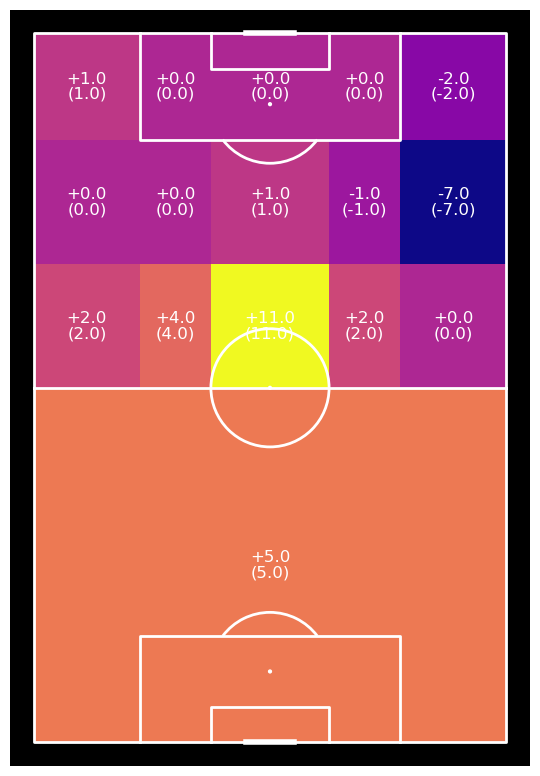

In [7]:
fig, ax = pitch.draw(figsize=(5.5, 8))
hm = pitch.heatmap_positional([bs1, bs2], ax=ax, cmap='plasma')
pitch.label_heatmap([bs1, bs2], va='bottom', ha='center', color='white', ax=ax, fontsize=12, str_format='{0:+}');
pitch.label_heatmap([bs1, bs2], va='top', ha='center', color='white', ax=ax, fontsize=12, str_format='({:.1f})');